In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

In [3]:
df=pd.read_csv('BeerWineLiquor.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [6]:
df['date']=pd.to_datetime(df['date'])
df.head()

,date,beer
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


Text(0.5, 1.0, '1st 25 points')

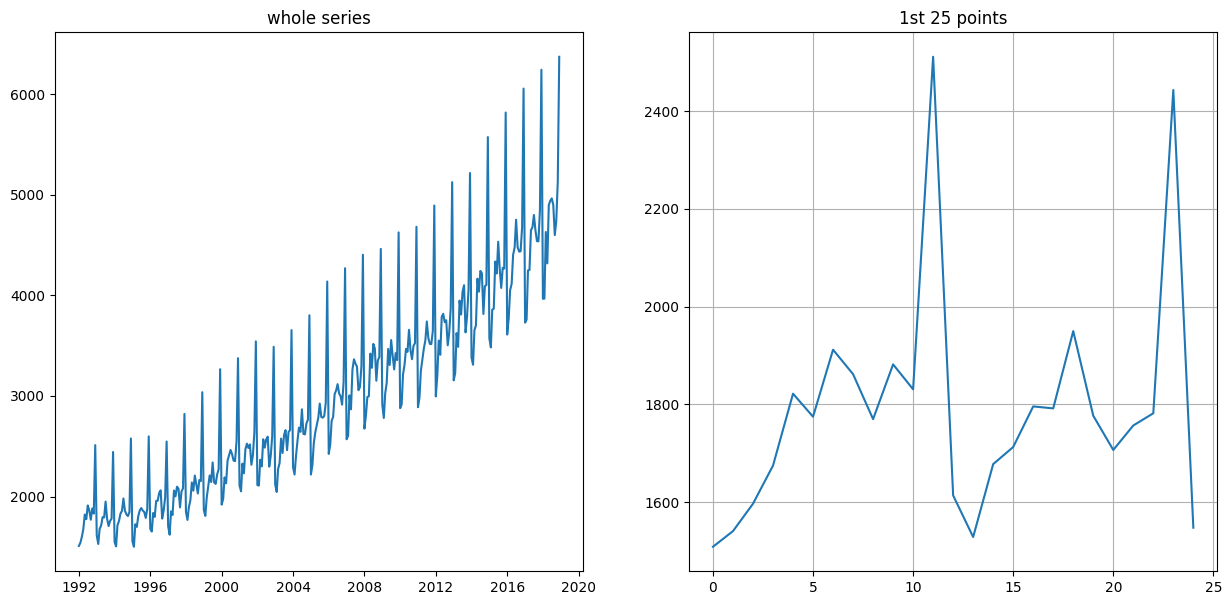

In [11]:
ax=plt.figure(figsize=[15,7])
ax.add_subplot(1,2,1)
plt.plot(df['date'],df['beer'])
plt.title('whole series')

ax.add_subplot(1,2,2)
plt.plot(df.iloc[0:25,1])
plt.grid()
plt.title('1st 25 points')

In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

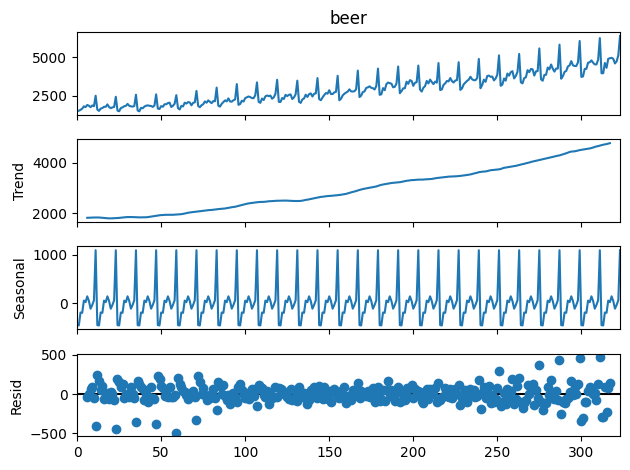

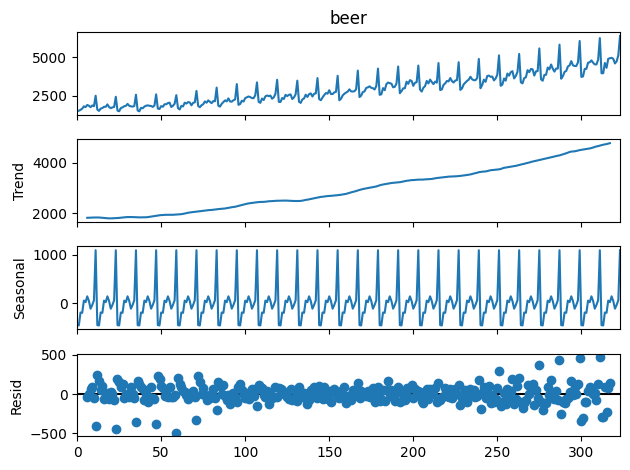

In [20]:
sd=seasonal_decompose(df['beer'],period=12)
sd.plot()

In [21]:
adfuller(df['beer'])

(2.8643085078972637,
 1.0,
 15,
 308,
 {'1%': -3.45176116018037,
  '5%': -2.870970093607691,
  '10%': -2.571794416006072},
 3570.218090367952)

Text(0.5, 1.0, 'differenced series')

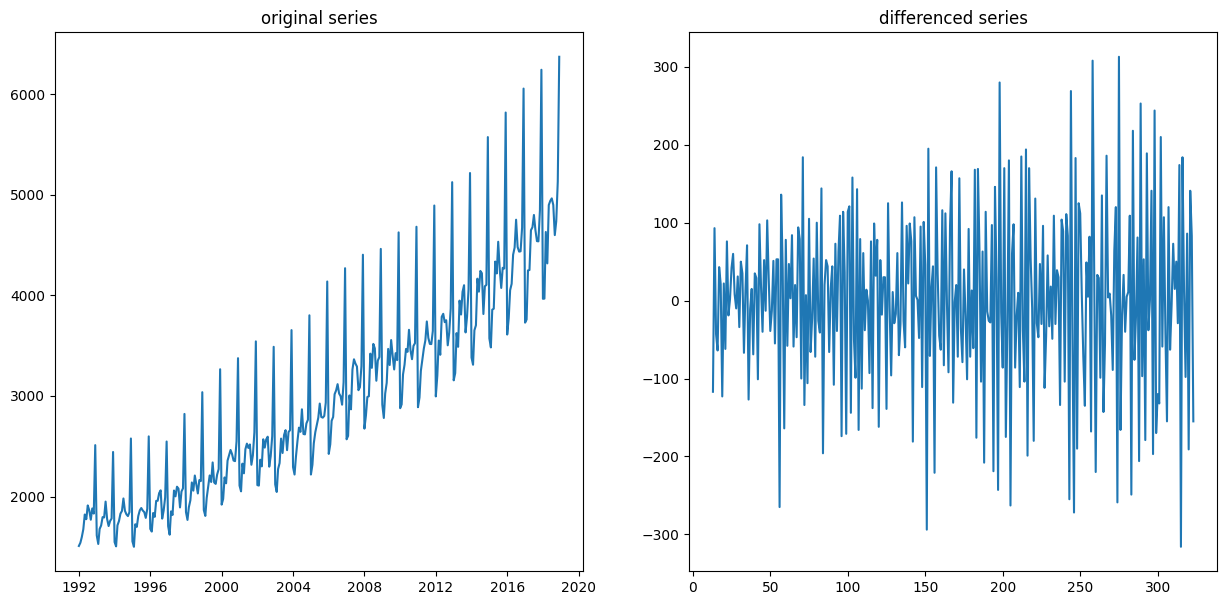

In [56]:
ax=plt.figure(figsize=[15,7])
ax.add_subplot(1,2,1)
plt.plot(df['date'],df['beer'])
plt.title('original series')

ax.add_subplot(1,2,2)
plt.plot(df['beer'].diff(12).diff().dropna())
plt.title('differenced series')

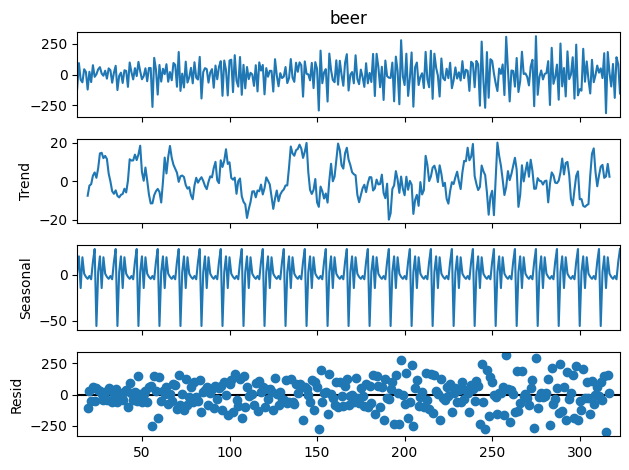

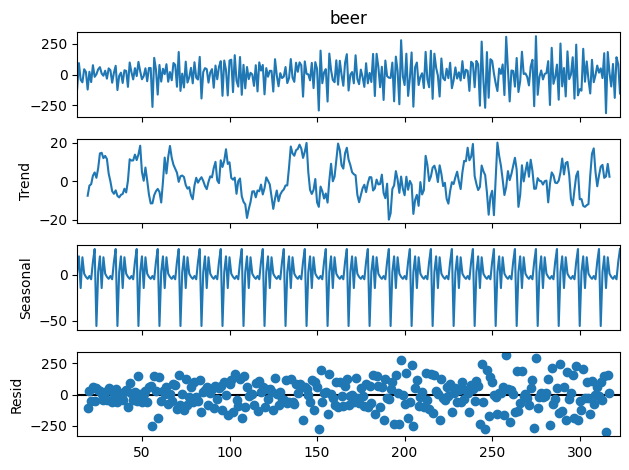

In [54]:
sd1=seasonal_decompose(df['beer'].diff(12).diff(1).dropna(),period=12)
sd1.plot()

In [52]:
adfuller(df['beer'].diff(12).diff().dropna())

(-8.639802392305912,
 5.4649558880665265e-14,
 16,
 294,
 {'1%': -3.452789844280995,
  '5%': -2.871421512222641,
  '10%': -2.5720351510944512},
 3368.5346466260135)

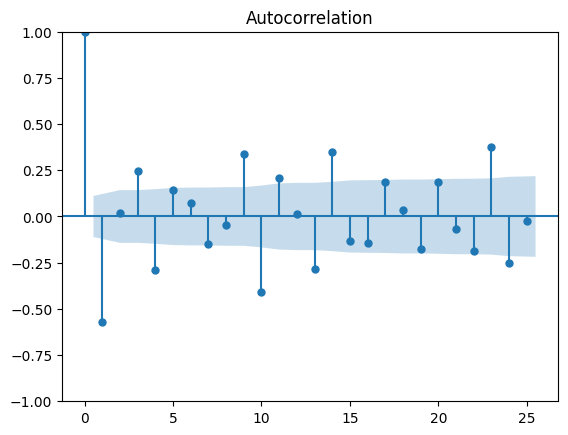

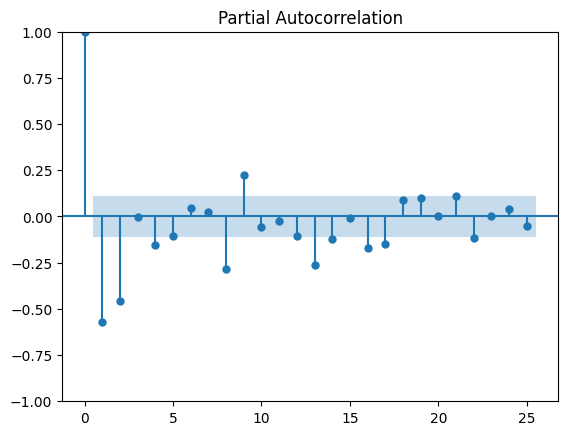

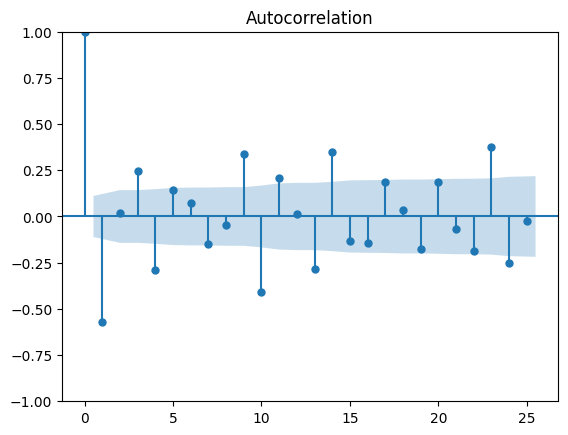

In [65]:
plot_pacf(df['beer'].diff(12).diff().dropna())
plot_acf(df['beer'].diff(12).diff().dropna())

In [67]:
train,test=df.iloc[0:300,:],df.iloc[300:,:]

In [78]:
mod=ARIMA(train['beer'],order=(3,1,1),seasonal_order=(3,1,1,12))
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             beer   No. Observations:                  300
Model:             ARIMA(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -1645.224
Date:                          Thu, 01 Aug 2024   AIC                           3308.447
Time:                                  19:18:34   BIC                           3341.383
Sample:                                       0   HQIC                          3321.647
                                          - 300                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0801      0.091      0.885      0.376      -0.097       0.258
ar.L2          0.2064      0.091      2.277      0.023       0.029       0.384
ar.L3          0.2840      0.078      3.632      0.000       0.131       0.437
ma.L1         -0.9280      0.064    -14.575      0.000      -1.053      -0.803
ar.S.L12       0.0972      0.219      0.443      0.658      -0.332       0.527
ar.S.L24      -0.1428      0.075     -1.904      0.057      -0.290       0.004
ar.S.L36      -0.2233      0.081     -2.761      0.006      -0.382      -0.065
ma.S.L12      -0.3222      0.216     -1.494      0.135      -0.745       0.101
sigma2      5474.0957    446.371     12.264      0.000    4599.225    6348.966
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.00
Prob(Q):                              0.91   Prob(JB):                         0.61
Heteroskedasticity (H):               1.88   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
test['res']=res.forecast(len(test))

C:\Users\Admin\AppData\Local\Temp\ipykernel_25080\3970319297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['res']=res.forecast(len(test))


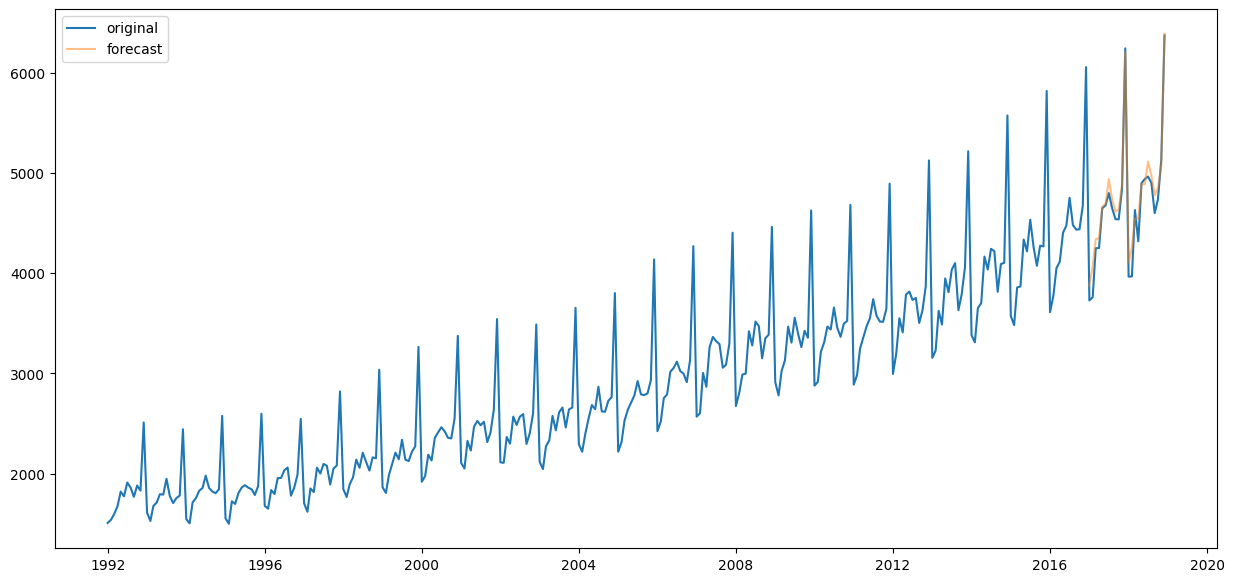

In [81]:
plt.figure(figsize=[15,7])
plt.plot(df['date'],df['beer'])
plt.plot(test['date'],test['res'],alpha=0.5)
plt.legend(['original','forecast'])

In [85]:
test

,date,beer,res
300,2017-01-01,3728,3875.825302
301,2017-02-01,3759,4070.131847
302,2017-03-01,4247,4338.037353
303,2017-04-01,4251,4347.261247
304,2017-05-01,4647,4661.853382
305,2017-06-01,4676,4691.221472
306,2017-07-01,4798,4937.199742
307,2017-08-01,4647,4734.023080
308,2017-09-01,4538,4613.334877
309,2017-10-01,4536,4635.478395


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
mae = mean_absolute_error(test['beer'], test['res'])
mse = mean_squared_error(test['beer'], test['res'])
rmse = np.sqrt(mse)
r_squared = r2_score(test['beer'], test['res'])


In [84]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

MAE: 106.12723195546111
MSE: 17680.448529125137
RMSE: 132.96784772690404
R-squared: 0.9534300666785607
